## Geocoding 

Geopandas가 제공하는 유용한 기능인 geocoding을 소개 하겠다. 이는 주소를 좌표로 바꾸거나, 좌표를 주소로 바꾸는 기능을 한다. 이 책에서는 geocoding을 위해서 google의 map API를 사용한다. 이 때, API를 사용하기 위해서 접근 키가 필요한데 이는 실습을 원한다면 본인이 직접 만들어야 한다. 만드는 방법은 이 페이지를 참고한다.(https://developers.googleblog.com/2016/03/introducing-google-api-console.html) (이 페이지에 나와 있는 Google Maps Android API 대신에, Geocoding API를 사용하도록 한다.)

다음 예제는 서울열린데이터광장에서 제공하는 "서울시 행정구역 읍면동 위치정보" 데이터를 이용해 서울의 지도를 시각화하고, "서울시 전통시장 현황" 데이터에 있는 전통시장의 주소를 좌표로 바꾸어 지도 위에 점으로 나타내는 것이다. 

* "서울시 행정구역 읍면동 위치정보" 데이터 다운로드 링크

  - https://data.seoul.go.kr/dataList/datasetView.do?infId=OA-13223&srvType=S&serviceKind=1&currentPageNo=1&searchValue=&searchKey=null
  - 위 링크의 "MAP" $\rightarrow$ "TL_SCCO_EMD_2015_W_SHP.zip"을 다운로드 받는다. 

* "서울시 전통시장 현황" 데이터 다운로드 링크

  - http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-1176&srvType=F&serviceKind=1&currentPageNo=1
  - 위 링크의 "File" $\rightarrow$ "contents.xlsx"을 다운로드 받는다. 

In [1]:
import geopandas as gpd

seoul_file = "/current_directory/TL_SCCO_EMD_2015_W_SHP/TL_SCCO_EMD_2015_W.shp"
seoul = gpd.read_file(seoul_file, encoding='euckr')
seoul.tail()

,EMD_CD,EMD_KOR_NM,EMD_ENG_NM,ESRI_PK,SHAPE_AREA,SHAPE_LEN,geometry
462,11170133,서빙고동,Seobinggo-dong,461,0.000081,0.038065,"POLYGON ((126.991846532 37.52515417799998, 126..."
463,11170134,주성동,Juseong-dong,462,0.000018,0.021908,"POLYGON ((126.99820106 37.52447825600001, 126...."
464,11170122,문배동,Munbae-dong,442,0.000012,0.018005,"POLYGON ((126.970954824 37.53771650800002, 126..."
465,11170103,용산동4가,Yongsan-dong 4(sa)-ga,447,0.000081,0.036409,"POLYGON ((126.988095507 37.53433249699998, 126..."
466,11170112,원효로1가,Wonhyoro 1(iI)-ga,449,0.000021,0.020099,"POLYGON ((126.970521024 37.5415352, 126.970578..."


In [2]:
market_file = "/current_directory/Book/contents.xlsx"
market = pd.read_excel(market_file)
market.tail(3)

,콘텐츠 ID (필수 입력),사용유무 (필수입력),콘텐츠명 (필수 입력),서브카테고리 명 (선택 입력),시군 (선택입력),구명 (선택입력),새주소[도로명 주소] (조건부 선택 입력),지번주소,키워드,다국어 (필수 입력),...,상세 제목16 (선택 입력),상세 내용16 (선택 입력),상세 제목17 (선택 입력),상세 내용17 (선택 입력),상세 제목18 (선택 입력),상세 내용18 (선택 입력),상세 제목19 (선택 입력),상세 내용19 (선택 입력),상세 제목20 (선택 입력),상세 내용20 (선택 입력)
346,Sijang_ddm_004,Y,동서시장,일반시장,NaN,동대문구,왕산로33길 13,동대문구 제기동 650,NaN,KOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,Sijang_ddm_003,Y,경동시장,일반시장,NaN,동대문구,왕산로 147,동대문구 제기동 1018,NaN,KOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,Sijang_ddm_001,Y,용두시장,일반시장,NaN,동대문구,한빛로 62-1,동대문구 용두동 231-5,NaN,KOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
address = "서울 특별시 " + market["지번주소"].sample(50)
address = list(address)
address[:3]

['서울 특별시 동작구 상도동 324-1', '서울 특별시 영등포구 신길동 255-9', '서울 특별시 동작구 사당동 318-8']

In [4]:
location = gpd.tools.geocode(address, provider='googlev3', api_key="your_api_key")
location.tail()

,geometry,address
45,POINT (127.0110531 37.5704381),"436-41 Changsin-dong, Jongno-gu, Seoul, South ..."
46,POINT (127.0021911 37.4992379),"163 Banpo-dong, Seocho-gu, Seoul, South Korea"
47,POINT (127.0806369 37.6167463),"157-34 Muk-dong, Jungnang-gu, Seoul, South Korea"
48,POINT (127.0229047 37.630752),"54-5 Suyu-dong, Gangbuk-gu, Seoul, South Korea"
49,POINT (126.8911206 37.5228224),"30 Yangpyeongdong 1(il)-ga, Yeongdeungpo-gu, S..."


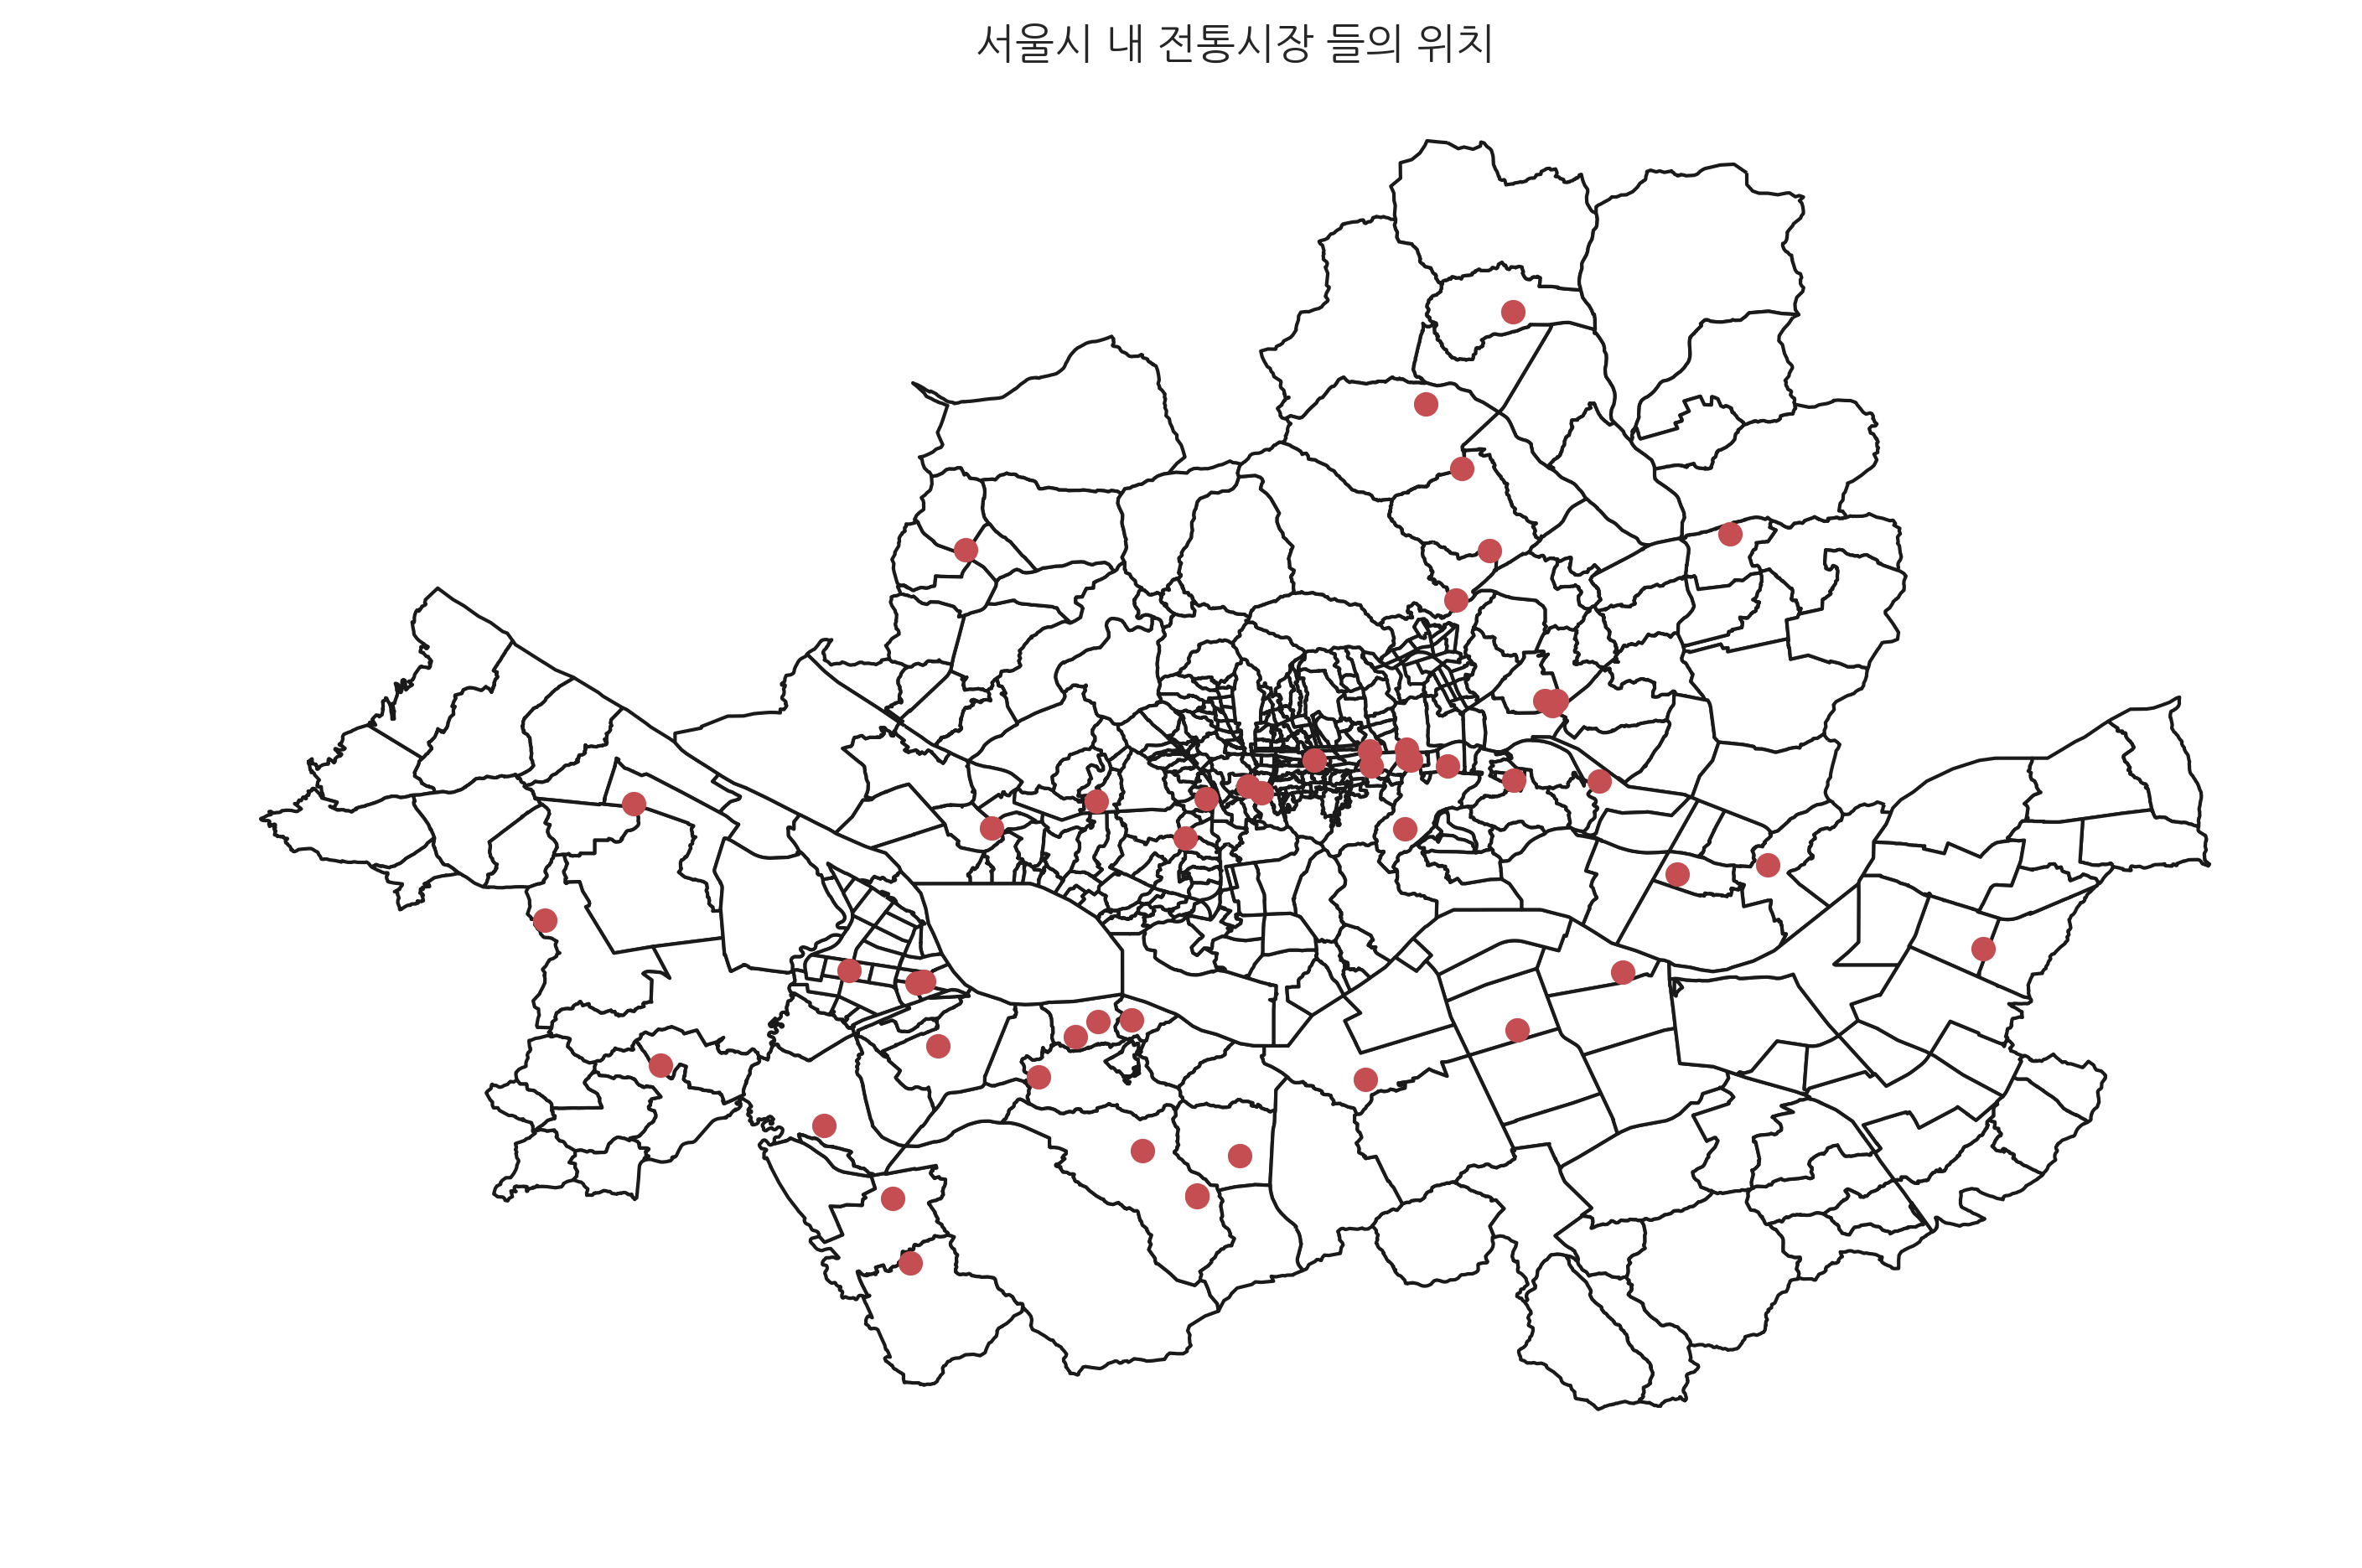

In [5]:
ax = seoul.plot(figsize=(11, 11), color="w", edgecolor="k")
ax.set_title("서울시 내 전통시장 들의 위치")
location.plot(ax=ax, color='r')
ax.set_axis_off()
plt.show()